# **I - Nội dung**

"Đây là một bộ dữ liệu chuyển đổi chứa tất cả các giao dịch diễn ra từ ngày 01/12/2010 đến ngày 09/12/2011 dành cho một công ty bán lẻ trực tuyến có trụ sở tại Vương quốc Anh và đăng ký hợp pháp. Công ty chủ yếu bán các món quà phù hợp cho mọi dịp. Nhiều khách hàng của công ty là các nhà bán buôn."

# **II - Làm sạch dữ liệu**

## 📚 Đọc dữ liệu (Input) và khai báo thư viện

In [1]:
# Import các thư viện cần thiết
import pandas as pd                # Xử lý dữ liệu bảng
import numpy as np                # Xử lý giá trị thiếu, NaN, toán học
import dateparser                 # Parse ngày tháng từ chuỗi tự nhiên
from datetime import datetime     # Làm việc với thời gian
from collections import Counter   # Đếm lỗi hoặc dữ liệu bất thường
import math                       # Thư viện toán
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'data\transaction_data.csv')
df.sample(5)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
169899,551269,21937,STRAWBERRY PICNIC BAG,5,2011-04-27 12:21:00,2.95,12840.0,United Kingdom
294074,562688,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,6,2011-08-08 13:53:00,1.25,13869.0,United Kingdom
504829,578995,23206,LUNCH BAG APPLE DESIGN,4,2011-11-27 15:59:00,1.65,15861.0,United Kingdom
171651,551439,22894,TABLECLOTH RED APPLES DESIGN,2,2011-04-28 15:26:00,9.95,14758.0,United Kingdom
505190,579002,85034C,3 ROSE MORRIS BOXED CANDLES,4,2011-11-27 16:27:00,1.25,14093.0,United Kingdom


## 🍍 Khám phá, thống kê các chỉ số của dataframe

In [3]:
# Đếm số dòng, cột
df.shape

(516384, 8)

In [6]:
# Liệt kê tên các cột trong dataframe
df.columns

Index(['invoice_num', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'cust_id', 'country'],
      dtype='object')

In [7]:
# Thống kê (chỉ dành cho định dạng số)
df.describe()

,quantity,unit_price,cust_id
count,516384.000000,516384.000000,389168.000000
mean,9.586116,4.579709,15287.024473
std,156.331122,94.287694,1712.959478
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13952.000000
50%,3.000000,2.080000,15154.000000
75%,10.000000,4.130000,16788.000000
max,74215.000000,38970.000000,18287.000000


In [8]:
# Show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516384 entries, 0 to 516383
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   516384 non-null  object 
 1   stock_code    516384 non-null  object 
 2   description   514945 non-null  object 
 3   quantity      516384 non-null  int64  
 4   invoice_date  516384 non-null  object 
 5   unit_price    516384 non-null  float64
 6   cust_id       389168 non-null  float64
 7   country       516384 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.5+ MB


In [9]:
df.sample(3)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
145113,548868,22424,ENAMEL BREAD BIN CREAM,2,2011-04-04 14:28:00,12.75,13015.0,United Kingdom
394220,570871,22756,LARGE YELLOW BABUSHKA NOTEBOOK,1,2011-10-12 16:36:00,2.46,NaN,United Kingdom
217980,555947,35924,HANGING FAIRY CAKE DECORATION,72,2011-06-08 10:45:00,1.69,14911.0,EIRE


## 🔍 Làm sạch dữ liệu

🔍 Tìm và xóa ❌ các ô trống

In [10]:
# Nếu chỉ muốn liệt kê các cột có giá trị rỗng
df.isna().sum()[df.isna().sum() > 0]

description      1439
cust_id        127216
dtype: int64

In [11]:
# Liệt kê columns index

for i, col in enumerate(df.columns):
    print(i, col)

0 invoice_num
1 stock_code
2 description
3 quantity
4 invoice_date
5 unit_price
6 cust_id
7 country


Như vậy có 2 cột có giá trị rỗng ➡️ Thực hiện xóa ô trống trong cột `description` và cột `cust_id`

In [12]:
# Xóa hàng null
df = df[df['description'].notna()]
df = df[df['cust_id'].notna()]

In [13]:
# Kiểm tra lại
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

➡️ Các ô trống trong cột `description` và cột `cust_id` đã được loại bỏ 🥂

In [14]:
# Đếm số dòng trùng lặp hoàn toàn
num_duplicates = df.duplicated().sum()
print(f"Số dòng trùng lặp hoàn toàn là: {num_duplicates}")

Số dòng trùng lặp hoàn toàn là: 4946


In [15]:
df.shape

(389168, 8)

In [16]:
# Xóa dòng duplicate
df = df.drop_duplicates(keep='first')

In [17]:
df.shape

(384222, 8)

✅ Định dạng các cột: cột `'invoice_date'` chuyển về dạng `datetime`

In [18]:
# Dịnh dạng cột 'invoice_date' thành datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [19]:
# Kiểm tra lại định dạng
print(df['invoice_date'].dtypes)  # đảm bảo kiểu là datetime64[ns]

datetime64[ns]


In [20]:
# Thống kê các lỗi datetime

import pandas as pd

# Danh sách các cột cần kiểm tra
cols_to_check = ['invoice_date']

def count_invalid_datetime(series):
    non_blank = series.dropna().astype(str).str.strip()
    non_blank = non_blank[non_blank != '']
    return (pd.to_datetime(non_blank, errors='coerce').isna()).sum()

# Thống kê lỗi định dạng datetime
invalid_counts = {col: count_invalid_datetime(df[col]) for col in cols_to_check}
invalid_counts

{'invoice_date': 0}

Như vậy cột `'invoice_date'` đã được định dạng theo chuẩn `datetime` ✔

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384222 entries, 0 to 516383
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   384222 non-null  object        
 1   stock_code    384222 non-null  object        
 2   description   384222 non-null  object        
 3   quantity      384222 non-null  int64         
 4   invoice_date  384222 non-null  datetime64[ns]
 5   unit_price    384222 non-null  float64       
 6   cust_id       384222 non-null  float64       
 7   country       384222 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 26.4+ MB


⚠️ Tìm các giá trị `< 0` trong dataframe

In [22]:
negative_quantity = df.loc[df['quantity'] < 0, 'quantity'].count()
negative_quantity

8516

In [23]:
negative_unit_price = df.loc[df['unit_price'] < 0, 'unit_price'].count()
negative_unit_price

0

In [24]:
negative_cust_id = df.loc[df['cust_id'] < 0, 'cust_id'].count()
negative_cust_id

0

🟡 Như vậy cột `'quantity'` có 8516 phần tử nhỏ hơn 0 ➡️ chuyển thành số `> 0`

In [25]:
# Lấy số dương bằng giá trị tuyệt đối
df['quantity'] = df['quantity'].abs()

In [26]:
# Kiểm tra lại kết quả xem còn giá trị âm không
negative_quantity = df.loc[df['quantity'] < 0, 'quantity'].count()
negative_quantity

0

📘 Thêm cột `amount = quantity * unit_price`

In [27]:
# Thêm cột amount
df['amount'] = df['quantity'] * df['unit_price']

In [28]:
# Kiểm tra lại dataframe
df.head(3)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


📆 Trích xuất thời gian từ cột `'invoice_date'`

In [29]:
df['month'] = df['invoice_date'].dt.month   # tháng
df['day'] = df['invoice_date'].dt.day       # ngày
df['hour'] = df['invoice_date'].dt.hour     # giờ
df['year_month'] = df['invoice_date'].dt.strftime('%Y-%m')
df['weekday'] = df['invoice_date'].dt.day_name()  # tên thứ: Monday, Tuesday...

In [30]:
# Kiểm tra lại dataframe
df.head(3)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,month,day,hour,year_month,weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,8,2010-12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2010-12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,8,2010-12,Wednesday


# III - EDA

In [31]:
# Kiểm tra tháng có phát sinh giao dịch
month_have_transaction = df['year_month'].value_counts().sort_values(ascending=True)
month_have_transaction.columns = ['year_month', 'count']
month_have_transaction.reset_index()

,year_month,count
0,2011-02,20138
1,2011-01,21670
2,2011-04,22988
3,2010-12,26354
4,2011-07,27256
5,2011-08,27444
6,2011-03,27516
7,2011-06,27576
8,2011-05,28661
9,2011-09,40459


## 💡 Monthly active user (MAU)

In [32]:
# Khách hàng giao dịch hàng tháng: monthly active user (MAU)

mau = df.groupby('year_month')['cust_id'].nunique().reset_index()
mau.columns = ['year_month', 'monthly_active_users']
print('Số lượng khách hàng có giao dịch hàng tháng:')
mau

Số lượng khách hàng có giao dịch hàng tháng:


,year_month,monthly_active_users
0,2010-12,948
1,2011-01,783
2,2011-02,798
3,2011-03,1020
4,2011-04,899
5,2011-05,1079
6,2011-06,1051
7,2011-07,993
8,2011-08,980
9,2011-09,1302


✅ Biểu đồ biểu diễn khách hàng giao dịch hàng tháng (MAU)

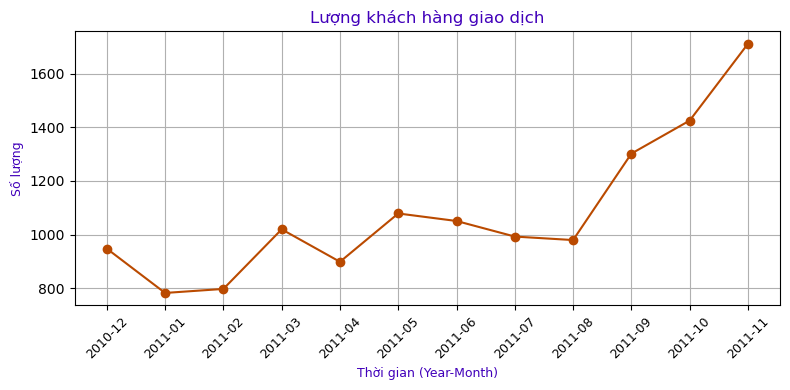

In [33]:
# Vẽ biểu đồ thống kê MAU
import matplotlib.pyplot as plt

# Vẽ biểu đồ đường MAU
plt.figure(figsize=(8, 4))         # Kích thước biểu đồ
plt.plot(mau['year_month'], mau['monthly_active_users'], marker='o', color='#ba4a00')   
# trục x biến 'year_month', trục y biến 'monthly_active_users'

# Thiết lập biểu đồ
plt.title('Lượng khách hàng giao dịch', fontsize=12, color="#4100ba")
plt.xlabel('Thời gian (Year-Month)', fontsize=9, color="#4100ba")
plt.ylabel('Số lượng', fontsize=9, color="#4100ba")
plt.xticks(rotation=45, fontsize=9, color = 'black')
plt.grid(True)
plt.tight_layout()
plt.show()


## 🟢 Số lượng đơn hàng và tổng giá trị đơn hàng mỗi tháng

In [34]:
import pandas as pd

# Tính số lượng đơn hàng mỗi tháng
num_orders_per_month = df.groupby('year_month')['invoice_num'].nunique().reset_index()
num_orders_per_month.columns = ['year_month', 'num_orders']         # Đặt lại tên cột

# Tính tổng giá trị đơn hàng mỗi tháng
total_amount_per_month = df.groupby('year_month')['amount'].sum().reset_index()
total_amount_per_month.columns = ['year_month', 'total_amount']     # Đặt lại tên cột

# Merge hai bảng lại thành 1
summary = pd.merge(num_orders_per_month, total_amount_per_month, on='year_month')

print(summary)


   year_month  num_orders  total_amount
0     2010-12        1708    588472.600
1     2011-01        1236    662470.720
2     2011-02        1202    456635.770
3     2011-03        1619    609587.310
4     2011-04        1384    511525.991
5     2011-05        1849    707698.630
6     2011-06        1707    713229.580
7     2011-07        1593    624813.481
8     2011-08        1544    673023.990
9     2011-09        2078    972024.172
10    2011-10        2263   1097978.520
11    2011-11        3086   1185596.150


✅ Biểu đồ biểu diễn số lượng đơn hàng và tổng giá trị đơn hàng trong tháng

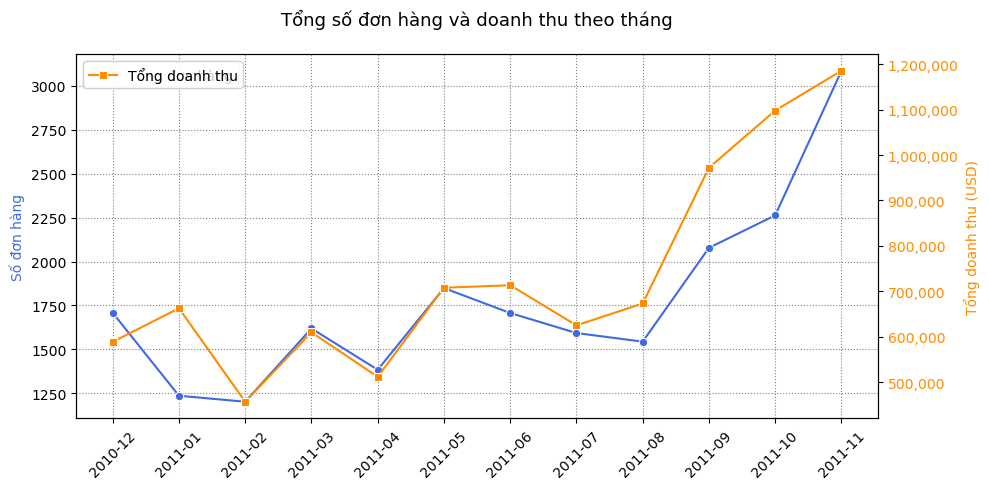

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Hàm định dạng số tiền có dấu phẩy
def format_with_comma(x, pos):
    return f'{int(x):,}'

# Dữ liệu đầu vào
dfplot = summary.sort_values('year_month')

# Tạo biểu đồ
plt.figure(figsize=(10, 5))

# --- Trục trái: Tổng đơn hàng ---
plt.subplot(1, 1, 1)
sns.lineplot(
    data=dfplot,
    x='year_month',
    y='num_orders',
    marker='o',
    label='Tổng đơn hàng',
    color='royalblue'
)

plt.ylabel('Số đơn hàng', color='royalblue')
plt.xlabel('')
plt.xticks(rotation=45)
plt.grid(True, ls=':', color='gray')

# --- Trục phải: Tổng doanh thu ---
ax2 = plt.gca().twinx()
sns.lineplot(
    data=dfplot,
    x='year_month',
    y='total_amount',
    marker='s',
    label='Tổng doanh thu',
    color='darkorange',
    ax=ax2
)

plt.ylabel('Tổng doanh thu (USD)', color='darkorange')
ax2.yaxis.set_major_formatter(FuncFormatter(format_with_comma))
ax2.tick_params(axis='y', labelcolor='darkorange')

# Tiêu đề và căn chỉnh
plt.title('Tổng số đơn hàng và doanh thu theo tháng\n', loc='center', fontsize=13)
plt.tight_layout()
plt.show()


### ️🏀 Kết luận: 

-   Từ tháng 08-2011 doanh thu và đơn hàng đã tăng lên đều đặn (có thể công ty đã áp dụng các biện pháp marketing phù hợp và hiệu quả)<br>
-   Trước đó, doanh thu và đơn hàng không ổn định nhưng đồng biến (cùng tăng hoặc cùng giảm)<br>

## 🟨 Phân tích số lượng khách hàng theo ngày trong tuần và theo giờ

In [36]:
# 1. Số lượng khách hàng theo ngày trong tuần
customer_by_weekday = df.groupby('weekday')['cust_id'].nunique().reset_index()
customer_by_weekday = customer_by_weekday.sort_values('cust_id', ascending=False)   # Sort giảm dần

# 2. Số lượng khách hàng theo giờ
customer_by_hour = df.groupby('hour')['cust_id'].nunique().reset_index()
customer_by_hour = customer_by_hour.sort_values('hour')

# In kết quả
print("Số lượng khách hàng theo ngày trong tuần:")
print(customer_by_weekday)
print('=================================')
print("\nSố lượng khách hàng theo giờ:")
print(customer_by_hour)

Số lượng khách hàng theo ngày trong tuần:
     weekday  cust_id
3   Thursday     2119
5  Wednesday     1890
4    Tuesday     1805
1     Monday     1721
0     Friday     1635
2     Sunday     1225

Số lượng khách hàng theo giờ:
    hour  cust_id
0      6       21
1      7       30
2      8      432
3      9      973
4     10     1365
5     11     1406
6     12     1685
7     13     1641
8     14     1470
9     15     1377
10    16      911
11    17      587
12    18      200
13    19      151
14    20       24


️✅ Biểu đồ phân tích số lượng khách hàng theo ngày trong tuần và theo giờ

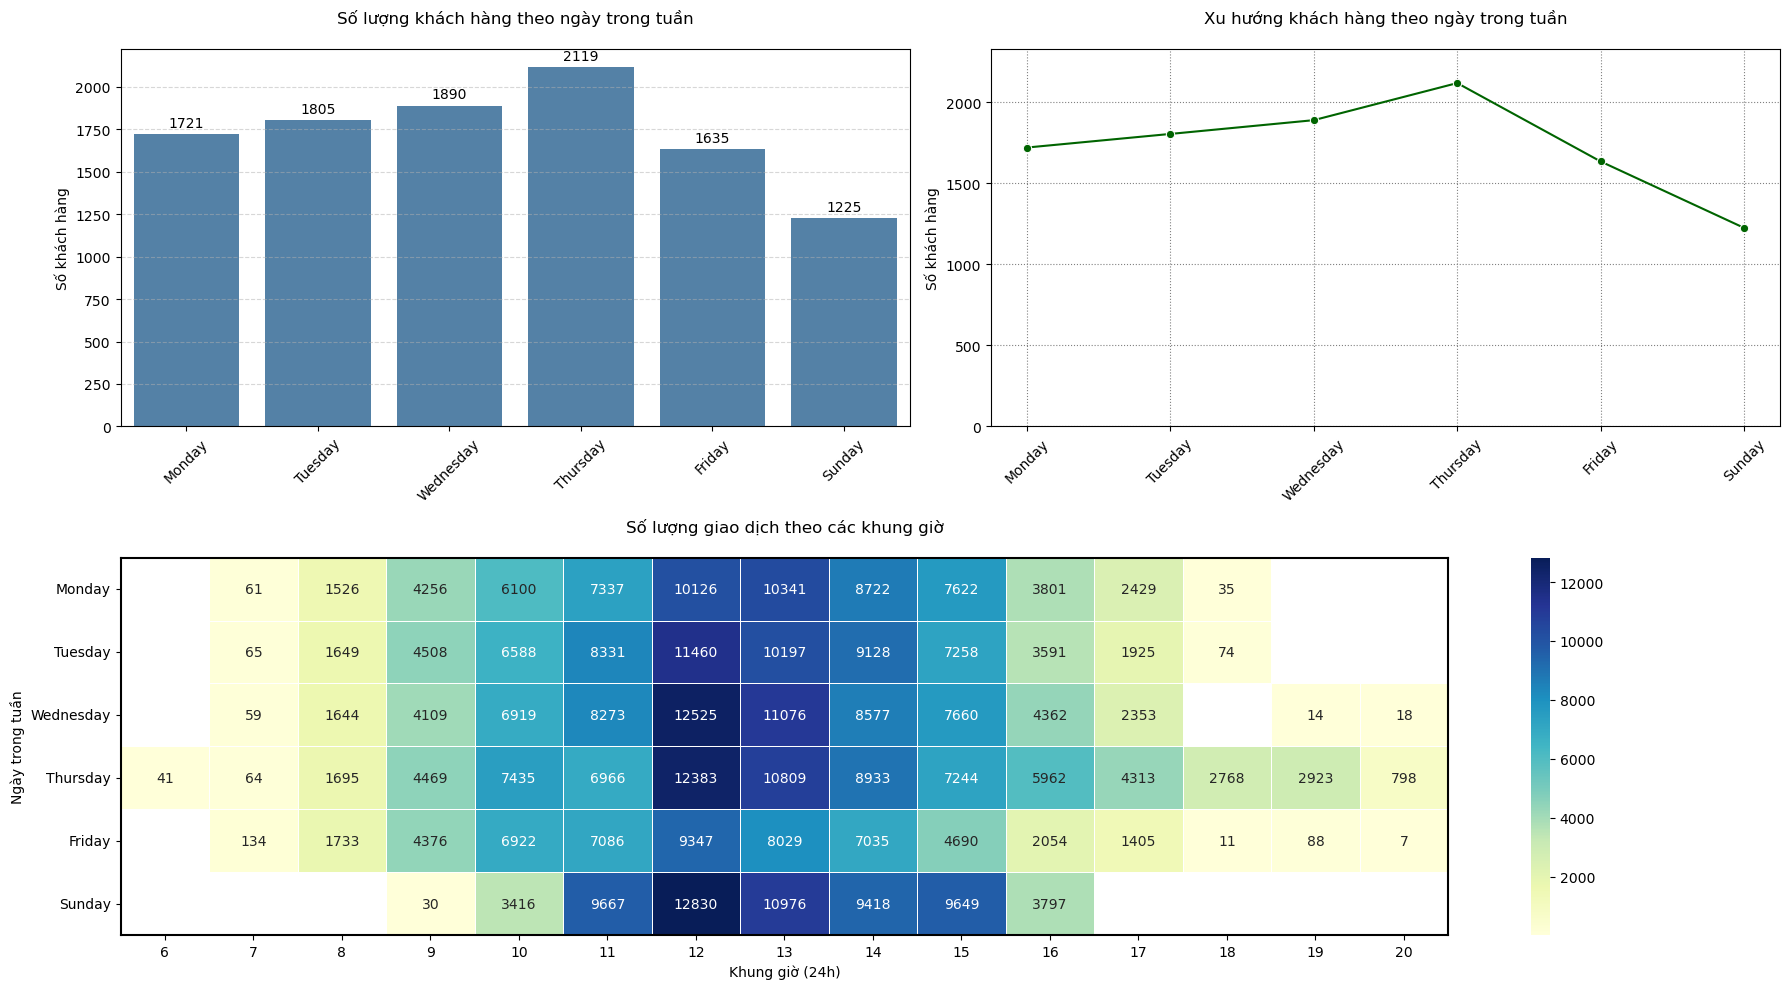

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# BƯỚC 1: Dữ liệu khách hàng theo weekday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
customer_by_weekday = customer_by_weekday.set_index('weekday').loc[weekday_order].reset_index()

# BƯỚC 2: Pivot heatmap
pivot_data = df.groupby(['weekday', 'hour']).size().reset_index(name='num_transactions')
heatmap_data = pivot_data.pivot(index='weekday', columns='hour', values='num_transactions')
heatmap_data = heatmap_data.reindex(weekday_order)

# BƯỚC 3: Vẽ biểu đồ
plt.figure(figsize=(18, 10))

# --- Subplot 1: Barplot ---
plt.subplot(2, 2, 1)
ax1 = sns.barplot(
    data=customer_by_weekday,
    x='weekday',
    y='cust_id',
    color='steelblue'
)
for container in ax1.containers:
    ax1.bar_label(container, padding=3, fontsize=10, fmt='%d')

plt.xticks(rotation=45)
plt.ylabel('Số khách hàng')
plt.xlabel('')
plt.title('Số lượng khách hàng theo ngày trong tuần\n', loc='center')
plt.grid(axis='y', ls='--', alpha=0.5)

# --- Subplot 2: Lineplot ---
plt.subplot(2, 2, 2)
sns.lineplot(
    data=customer_by_weekday,
    x='weekday',
    y='cust_id',
    marker='o',
    color='darkgreen'
)
plt.xticks(rotation=45)
plt.ylabel('Số khách hàng')
plt.xlabel('')
plt.ylim(0, customer_by_weekday['cust_id'].max() * 1.1)
plt.title('Xu hướng khách hàng theo ngày trong tuần\n', loc='center')
plt.grid(True, ls=':', color='gray')

# --- Subplot 3: Heatmap ---
ax3 = plt.subplot(2, 1, 2)  # Gán ax3 để xử lý viền
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    linewidths=0.5,
    annot=True,
    fmt='g',
    ax=ax3
)
ax3.set_title('Số lượng giao dịch theo các khung giờ\n', loc='center')
ax3.set_xlabel('Khung giờ (24h)')
ax3.set_ylabel('Ngày trong tuần')

# 👉 Đóng viền đen cho heatmap
for spine in ax3.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1.5)

# --- Layout cuối ---
#plt.tight_layout(h_pad=3)
plt.tight_layout()
plt.show()


### 📚 **Kết luận:**
-   Số lượng khách hàng giao dịch tăng dần từ thứ 2 đến cao nhất là thứ 5 sau đó giảm dần đều đến thấp nhất là CN<br>
-   Đặc biệt thứ 7 không phát sinh giao dịch<br>
-   Khung giờ khách hàng ưa thích là từ 9 giờ đến 15 giờ hàng ngày

🎯 Điều này giúp công ty phân bố nhân sự cho phù hợp với số lượng giao dịch theo các khung giờ cụ thể.

## ✅ Top 10 quốc gia mang lại doanh số bán hàng cao nhất

In [39]:
# Nhóm theo quốc gia và tính tổng doanh thu
top_countries = df.groupby('country')['amount'].sum().reset_index()

# Sắp xếp giảm dần theo doanh thu
top_countries = top_countries.sort_values('amount', ascending=False)

# Lấy Top 10 quốc gia
top_10_countries = top_countries.head(10)

print(top_10_countries)

           country       amount
35  United Kingdom  7177083.014
23     Netherlands   274503.120
10            EIRE   273541.670
14         Germany   227683.690
13          France   213737.560
0        Australia   139897.850
30           Spain    68000.100
32     Switzerland    57148.500
3          Belgium    40055.690
31          Sweden    39674.250


✅ Biểu đồ 10 quốc gia có doanh số bán hành cao nhất

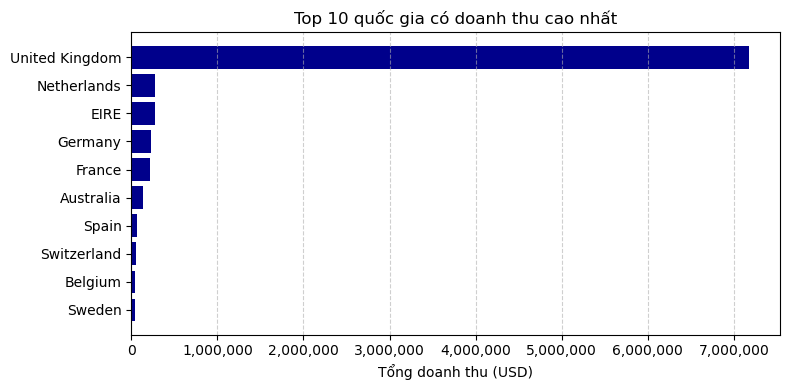

In [40]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Hàm định dạng lại trục X (hiển thị dấu phẩy ngăn cách hàng nghìn)
def format_usd(x, _):
    return f'{int(x):,}'

# Vẽ biểu đồ
plt.figure(figsize=(8, 4))
plt.barh(top_10_countries['country'], top_10_countries['amount'], color="#00008B")
plt.xlabel('Tổng doanh thu (USD)')
plt.title('Top 10 quốc gia có doanh thu cao nhất')
plt.gca().invert_yaxis()  # Quốc gia có doanh thu cao nhất nằm trên

# 👉 Hiển thị lưới trục X để dễ so sánh
plt.grid(axis='x', linestyle='--', alpha=0.6)

# 👉 Hiển thị dạng đơn vị
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_usd))

plt.tight_layout()
plt.show()


## 🟢 Tính AOV

Các quốc gia có AOV (Average Order Value) - Giá trị đơn hàng trung bình cao nhất:<br>
`AOV = [Tổng giá trị đơn hàng] / [Số lượng đơn hàng]`

In [41]:
# Nhóm theo quốc gia, tính tổng doanh thu và số lượng đơn hàng
aov_df = df.groupby('country').agg(
    total_amount=('amount', 'sum'),
    total_orders=('invoice_num', 'nunique')
).reset_index()

# Tính AOV
aov_df['AOV'] = aov_df['total_amount'] / aov_df['total_orders']

# Lấy Top 5 quốc gia có AOV cao nhất
top_country_aov = aov_df.sort_values('AOV', ascending=False).head(15)

# In bảng kết quả
print(top_country_aov)

        country  total_amount  total_orders          AOV
29    Singapore      33438.19            10  3343.819000
23  Netherlands     274503.12            98  2801.052245
0     Australia     139897.85            69  2027.505072
20      Lebanon       1693.88             1  1693.880000
19        Japan      39375.19            27  1458.340370
17       Israel       7443.28             6  1240.546667
4        Brazil       1143.60             1  1143.600000
33          USA       4274.66             4  1068.665000
27          RSA       1002.31             1  1002.310000
9       Denmark      18973.64            20   948.682000
24       Norway      34381.72            37   929.235676
31       Sweden      39674.25            44   901.687500
10         EIRE     273541.67           309   885.248123
15       Greece       4129.53             5   825.906000
32  Switzerland      57148.50            71   804.908451


✅ Biểu đồ AOV

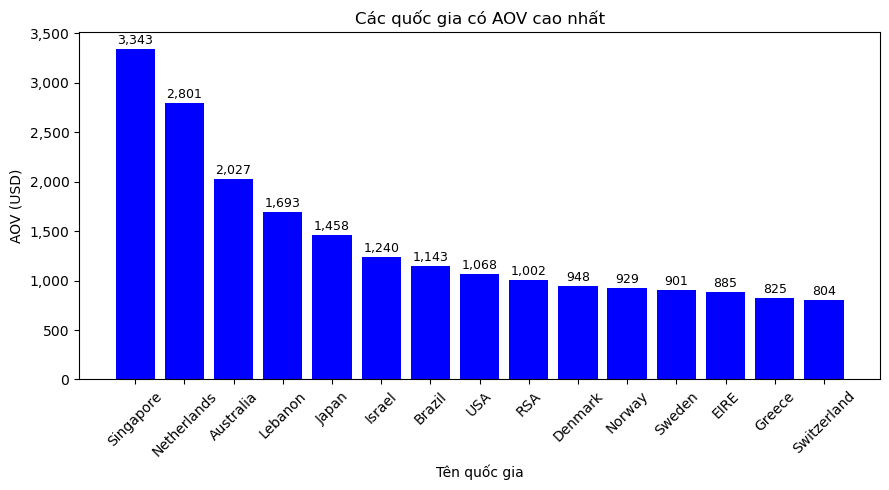

In [43]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Hàm định dạng AOV có dấu phẩy
def format_aov(x, _):
    return f'{int(x):,}'

# Thiết lập biểu đồ
plt.figure(figsize=(9, 5))
plt.bar(top_country_aov['country'], top_country_aov['AOV'], color='blue')
plt.title('Các quốc gia có AOV cao nhất')
plt.xlabel('Tên quốc gia')
plt.ylabel('AOV (USD)')
plt.xticks(rotation=45)

# Định dạng lại trục Y để không hiện dạng 1e6
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_aov))

# Hiển thị nhãn AOV trên từng cột
for i, value in enumerate(top_country_aov['AOV']):
    plt.text(i, value + 20, f'{int(value):,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## 📝Tính lượng khách hàng mới và cũ hàng tháng

In [44]:
# Bước 1: Lấy tháng đầu tiên mà mỗi khách hàng xuất hiện (mua hàng lần đầu)
first_purchase = df.groupby('cust_id')['year_month'].min().reset_index()
first_purchase.columns = ['cust_id', 'first_month']


# Bước 2: Gắn tháng đầu tiên đó vào bảng dữ liệu gốc
df = df.merge(first_purchase, on='cust_id', how='left')

# Bước 3: Tạo cột phân loại khách hàng
df['customer_type'] = df.apply(lambda row: 'New' if row['year_month'] == row['first_month'] else 'Existing', axis=1)

# Bước 4: Nhóm theo tháng và loại khách hàng, đếm số khách hàng duy nhất
monthly_customer_stats = df.groupby(['year_month', 'customer_type'])['cust_id'].nunique().reset_index()

# Bước 5: Pivot để xem bảng dễ đọc
customer_summary = monthly_customer_stats.pivot(index='year_month', columns='customer_type', values='cust_id').fillna(0).astype(int)

print(customer_summary)

customer_type  Existing  New
year_month                  
2010-12               0  948
2011-01             362  421
2011-02             418  380
2011-03             580  440
2011-04             600  299
2011-05             800  279
2011-06             816  235
2011-07             802  191
2011-08             813  167
2011-09            1004  298
2011-10            1073  352
2011-11            1390  321


✅ Biểu đồ khân bố khách hàng cũ và mới theo tháng

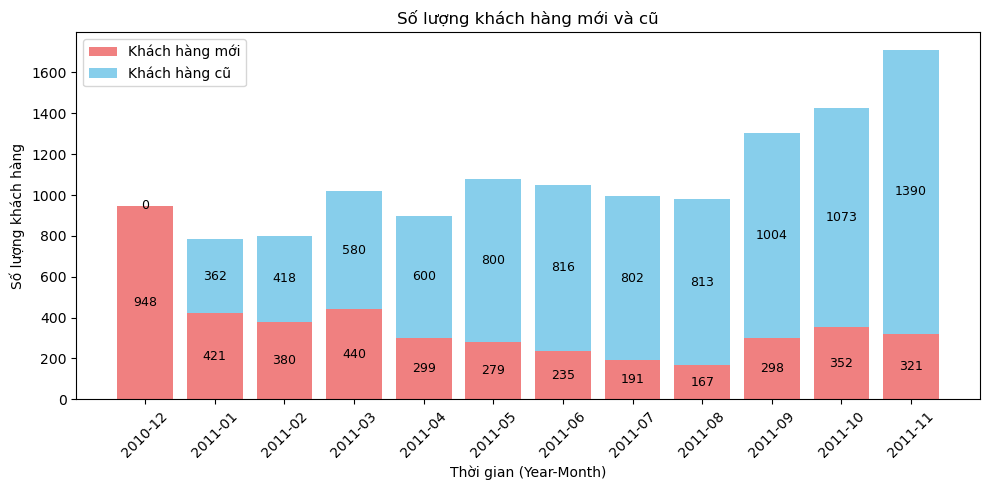

In [45]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ stacked bar
plt.figure(figsize=(10, 5))
bars_new = plt.bar(customer_summary.index, customer_summary['New'], label='Khách hàng mới', color='lightcoral')
bars_exist = plt.bar(customer_summary.index, customer_summary['Existing'],
                     bottom=customer_summary['New'], label='Khách hàng cũ', color='skyblue')

# Gán label 
plt.bar_label(bars_new, label_type='center', fontsize=9, color='black')
plt.bar_label(bars_exist, label_type='center', fontsize=9, color='black')

# Cài đặt trục và hiển thị
plt.title('Số lượng khách hàng mới và cũ')
plt.xlabel('Thời gian (Year-Month)')
plt.ylabel('Số lượng khách hàng')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [46]:
df.sample(3)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,month,day,hour,year_month,weekday,first_month,customer_type
304148,572242,22838,3 TIER CAKE TIN RED AND CREAM,2,2011-10-21 15:36:00,14.95,15677.0,United Kingdom,29.90,10,21,15,2011-10,Friday,2011-10,New
208185,562562,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,30,2011-08-05 17:43:00,2.08,16271.0,United Kingdom,62.40,8,5,17,2011-08,Friday,2010-12,Existing
365742,578036,23100,SILVER BELLS TABLE DECORATION,1,2011-11-22 14:04:00,1.25,16474.0,United Kingdom,1.25,11,22,14,2011-11,Tuesday,2011-07,Existing


### ➡️ Kết luận: khách hàng cũ có xu hướng quay lại nhiều hơn so với khách hàng mới

## 📚 Tính toán và phân loại khách hàng

Xét đến những khách hàng mới của tháng 12 năm 2010, giá trị giao dịch trung bình của những khách hàng này trong mỗi tháng khi họ quay lại là bao nhiêu?

In [47]:
# Bước 1: Xác định khách hàng mới trong tháng 12/2010
new_customers_dec2010 = first_purchase[first_purchase['first_month'] == '2010-12']['cust_id'].unique()

# Bước 2: Lọc tất cả giao dịch của nhóm này trong toàn bộ dataset
cohort_df = df[df['cust_id'].isin(new_customers_dec2010)].copy()

# Bước 3: Nhóm theo từng tháng: tính tổng tiền và số khách hàng quay lại
cohort_stats = cohort_df.groupby('year_month').agg(
    total_amount=('amount', 'sum'),
    num_customers=('cust_id', 'nunique')
).reset_index()

# Tính AOV: giá trị trung bình mỗi khách/tháng
cohort_stats['avg_order_value'] = cohort_stats['total_amount'] / cohort_stats['num_customers']

print(cohort_stats)

   year_month  total_amount  num_customers  avg_order_value
0     2010-12     588472.60            948       620.751688
1     2011-01     289131.47            362       798.705718
2     2011-02     244376.71            317       770.904448
3     2011-03     322069.12            367       877.572534
4     2011-04     212758.43            341       623.925015
5     2011-05     363366.00            376       966.398936
6     2011-06     327693.25            360       910.259028
7     2011-07     327753.36            336       975.456429
8     2011-08     360674.27            336      1073.435327
9     2011-09     493922.07            374      1320.647246
10    2011-10     487123.33            354      1376.054605
11    2011-11     538866.76            474      1136.849705


✅ Biểu đồ 

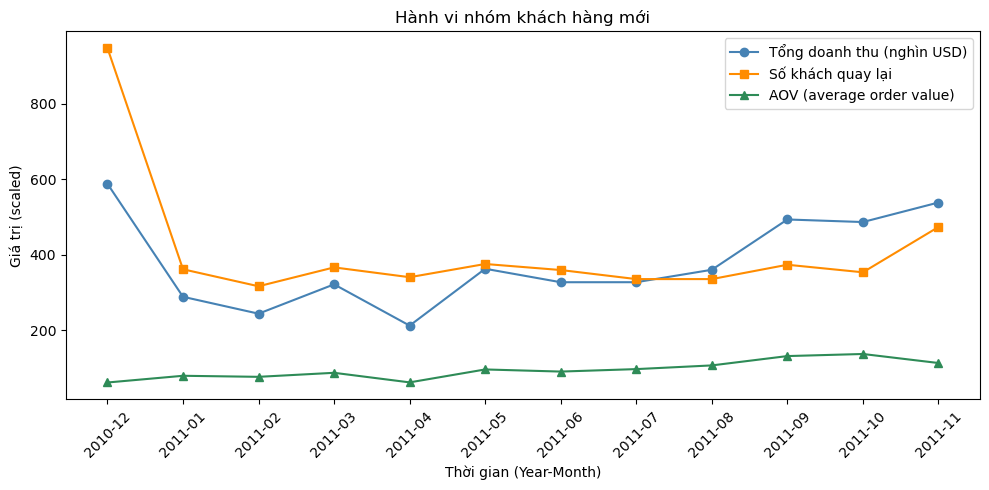

In [49]:
import matplotlib.pyplot as plt

# Chia nhỏ dữ liệu để dễ hiển thị
cohort_stats['amount_scaled'] = cohort_stats['total_amount'] / 1000    # nghìn VND
cohort_stats['aov_scaled'] = cohort_stats['avg_order_value'] / 10      # đơn vị chục VND

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.plot(cohort_stats['year_month'], cohort_stats['amount_scaled'], marker='o', label='Tổng doanh thu (nghìn USD)', color='steelblue')
plt.plot(cohort_stats['year_month'], cohort_stats['num_customers'], marker='s', label='Số khách quay lại', color='darkorange')
plt.plot(cohort_stats['year_month'], cohort_stats['aov_scaled'], marker='^', label='AOV (average order value)', color='seagreen')

# Cấu hình hiển thị
plt.title('Hành vi nhóm khách hàng mới')
plt.xlabel('Thời gian (Year-Month)')
plt.ylabel('Giá trị (scaled)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## ✈ Tính frequency, recency và phân loại khách hàng

-  **Recency - Gần nhất**: Recency là chỉ số đo lường khoảng thời gian kể từ lần cuối cùng khách hàng tương tác với sản phẩm hoặc dịch vụ của bạn. Câu hỏi chúng ta cần đặt ra là: `"Lần cuối cùng khách hàng này mua hàng của chúng ta đến hiện tại là mấy ngày?"`

      -  Khách hàng mới mua gần đây: Đây là những người đã mua sản phẩm hoặc dịch vụ gần đây nhất. Họ có thể đang cảm thấy hài lòng hoặc có nhu cầu cao.
      - Khách hàng mua từ lâu: Họ đã không mua hàng trong một thời gian dài, có thể họ đã quên sản phẩm của chúng ta hoặc đã tìm thấy sự lựa chọn khác.

- **Frequency - Tần suất**: Frequency đo lường số lần khách hàng mua hàng trong một khoảng thời gian nhất định. Câu hỏi cần trả lời là: `"Khách hàng này đã mua hàng bao nhiêu lần?"`      

      - Khách hàng thường xuyên: Họ mua hàng nhiều lần, cho thấy họ trung thành và có thể là những người yêu thích sản phẩm.<br>
      - Khách hàng ít mua: Họ ít mua hàng, có thể họ chỉ mua sản phẩm khi cần thiết hoặc có dịp đặc biệt.

![image.png](imgs/img1.png)


`recency` = `ngày giao dịch cuối cùng của transaction data` - `ngày giao dịch cuối cùng`

-     Recency:
         + 1đ: >48
         + 2đ: 15-48
         + 3đ: <15

-     Frequency:
         + 1đ: 1 
         + 2đ: 2-5
         + 3đ: >5 

✅ Bước 1: Tính frequency và ngày giao dịch cuối cùng cho từng khách hàng

In [50]:
rf_df = df.groupby('cust_id').agg(
    frequency=('invoice_num', 'nunique'),
    last_purchase_date=('invoice_date', 'max')
).reset_index()

✅ Bước 2: Tính Recency 

In [51]:
# Ngày tham chiếu: ngày cuối trong tập dữ liệu
max_date = df['invoice_date'].max()

# Tính Recency (số ngày kể từ lần cuối khách hàng mua hàng)
rf_df['recency'] = (max_date - rf_df['last_purchase_date']).dt.days

✅ Bước 3: Chấm điểm Recency và Frequency

In [52]:
# Chấm điểm Recency
rf_df['recency_score'] = rf_df['recency'].apply(
    lambda x: 3 if x < 15 else (2 if x <= 48 else 1)
)

# Chấm điểm Frequency
rf_df['frequency_score'] = rf_df['frequency'].apply(
    lambda x: 1 if x == 1 else (2 if x <= 5 else 3)
)

✅ Bước 4: Phân loại khách hàng theo bảng phân khúc

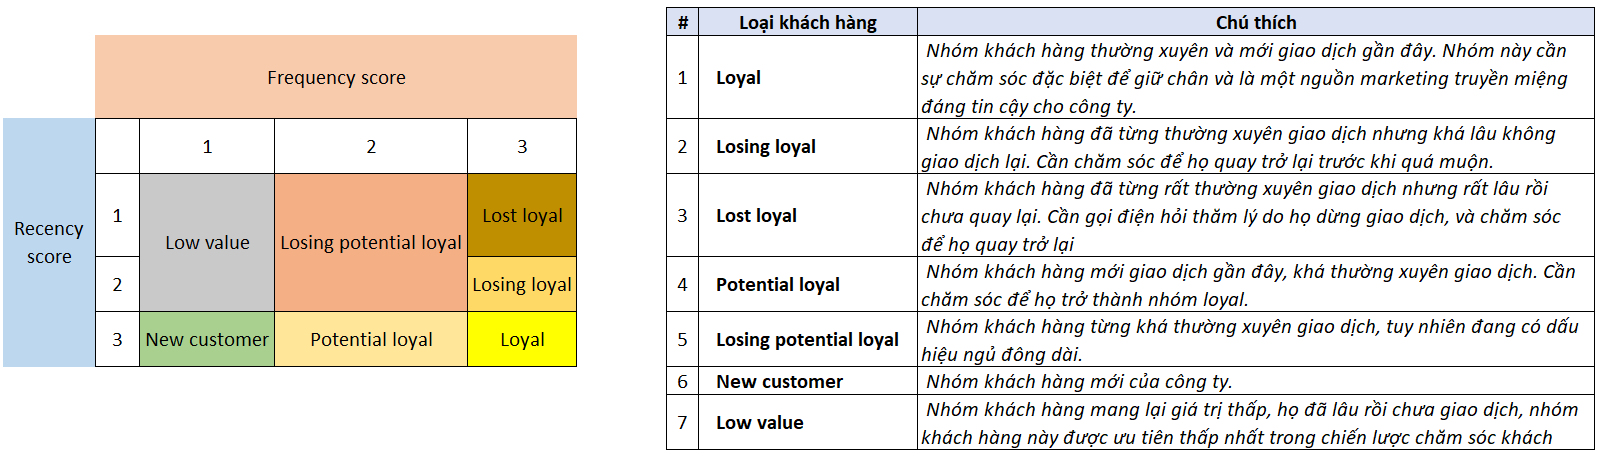

In [53]:
def classify_customer(r, f):
    if r == 3 and f == 3:
        return 'Loyal'
    elif r == 3 and f == 2:
        return 'Potential loyal'
    elif r == 3 and f == 1:
        return 'New customer'
    elif r == 2 and f == 3:
        return 'Losing loyal'
    elif r == 2 and f == 2:
        return 'Losing potential loyal'
    elif r == 1 and f == 3:
        return 'Lost loyal'
    elif r == 1 and f == 2:
        return 'Losing potential loyal'
    else:
        return 'Low value'

rf_df['segment'] = rf_df.apply(lambda row: classify_customer(row['recency_score'], row['frequency_score']), axis=1)


✅ Bước 5: Phân tích

📌 1. Số lượng khách hàng trong mỗi phân khúc:

In [54]:
segment_counts = rf_df['segment'].value_counts().reset_index()
segment_counts.columns = ['segment', 'num_customers']
print(segment_counts)

                  segment  num_customers
0  Losing potential loyal           1506
1               Low value           1241
2                   Loyal            524
3         Potential loyal            434
4            Losing loyal            331
5              Lost loyal            180
6            New customer            115


📌 2. Tỉ lệ % doanh thu theo từng phân khúc:

In [55]:
df = df.merge(rf_df[['cust_id', 'segment']], on='cust_id', how='left')

revenue_by_segment = df.groupby('segment')['amount'].sum().reset_index()
revenue_by_segment['percentage'] = 100 * revenue_by_segment['amount'] / revenue_by_segment['amount'].sum()

print(revenue_by_segment.sort_values('amount', ascending=False))

                  segment       amount  percentage
4                   Loyal  4093279.740   46.498390
1  Losing potential loyal  1706233.713   19.382287
0            Losing loyal  1628162.970   18.495427
6         Potential loyal   476843.740    5.416797
3               Low value   433360.641    4.922843
2              Lost loyal   431586.280    4.902686
5            New customer    33589.830    0.381570


📌 3. Biểu đồ kết hợp

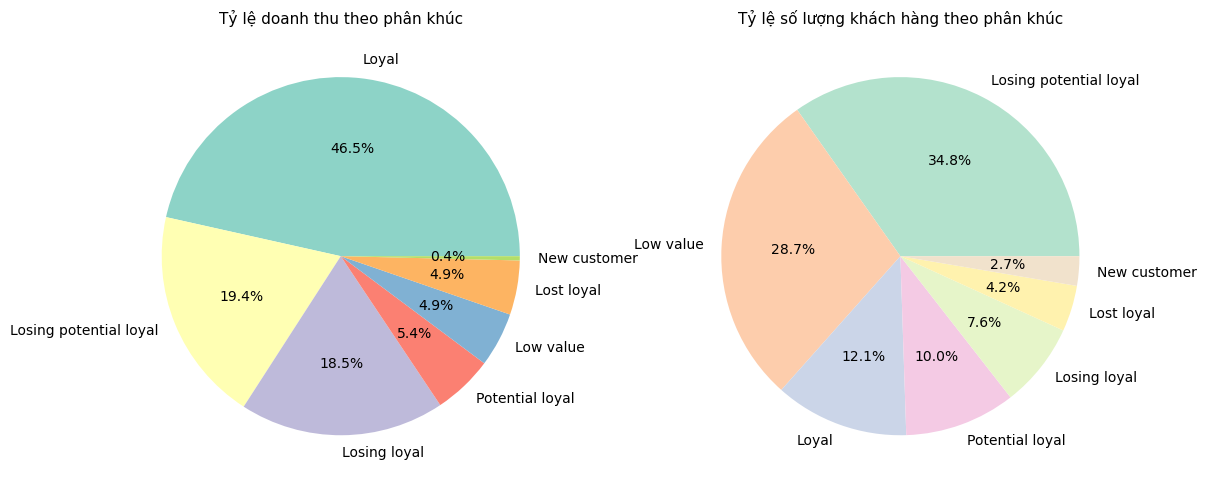

In [56]:
import matplotlib.pyplot as plt

# Pie chart: tỷ lệ doanh thu theo phân khúc
dfplot1 = revenue_by_segment.sort_values('percentage', ascending=False)

# Pie chart: tỷ lệ số lượng khách hàng theo phân khúc
dfplot2 = segment_counts.sort_values('num_customers', ascending=False)

# Tạo layout
plt.figure(figsize=(12, 5))

# --- Subplot 1: Pie chart - Doanh thu ---
plt.subplot(1, 2, 1)
plt.pie(
    x = dfplot1['percentage'], 
    labels = dfplot1['segment'], 
    autopct = '%1.1f%%',
    colors = plt.cm.Set3.colors
)
plt.title('Tỷ lệ doanh thu theo phân khúc', fontsize=11)

# --- Subplot 2: Pie chart - Số khách hàng ---
plt.subplot(1, 2, 2)
plt.pie(
    x = dfplot2['num_customers'], 
    labels = dfplot2['segment'], 
    autopct = '%1.1f%%',
    colors = plt.cm.Pastel2.colors
)
plt.title('Tỷ lệ số lượng khách hàng theo phân khúc', fontsize=11)

# Hoàn tất bố cục
plt.tight_layout()
plt.show()


### 🔁 Kết luận:

- Khách hàng `loyal` tuy số lượng chỉ `12.1%` nhưng chiếm `46.5%` doanh thu 👉 Đây là nhóm khách hàng `cần ưu tiên chăm sóc và giữ chân`
- Phân khúc `“Losing Potential Loyal”` có số lượng đông đảo nhưng có giá trị mua trung bình thấp 👉 Đây là nhóm tiềm năng `có nguy cơ rời bỏ`, nên cần triển khai các chương trình khuyến mãi, chăm sóc lại, nhắc nhở quay lại mua hàng để giữ chân và tăng giá trị đơn.

## ✅ Các quốc gia có số lượng khách hàng trung thành cao nhất và giá trị giao dịch trung bình (AOV) của họ

In [57]:
import pandas as pd

# 1. Xử lý dữ liệu: loại bỏ dòng NaN ở cột cust_id
df_valid = df.dropna(subset=['cust_id'])

# 2. Tìm các khách hàng có nhiều hơn 1 đơn hàng => khách hàng trung thành
loyal_customers = df_valid.groupby('cust_id')['invoice_num'].nunique()
loyal_customers = loyal_customers[loyal_customers > 1].index

# 3. Lọc dữ liệu chỉ chứa khách hàng trung thành
df_loyal = df_valid[df_valid['cust_id'].isin(loyal_customers)]

# 4. Nhóm theo quốc gia
country_loyal_summary = df_loyal.groupby('country').agg(
    num_loyal_customers=('cust_id', pd.Series.nunique),
    total_orders=('invoice_num', pd.Series.nunique),
    total_amount=('amount', 'sum')
).reset_index()

# 5. Tính AOV (Average Order Value)
country_loyal_summary['AOV'] = country_loyal_summary['total_amount'] / country_loyal_summary['total_orders']

# 6. Sắp xếp theo số khách hàng trung thành và lấy Top 15
top_15 = country_loyal_summary.sort_values('num_loyal_customers', ascending=False).head(15)

# 7. In kết quả
print(top_15[['country', 'num_loyal_customers', 'AOV']])


            country  num_loyal_customers          AOV
31   United Kingdom                 2686   381.570584
12          Germany                   72   390.313667
11           France                   61   501.677646
26            Spain                   22   676.807128
2           Belgium                   19   351.578148
28      Switzerland                   17   666.089104
23         Portugal                   13   536.733220
0         Australia                    9  2027.505072
7           Denmark                    8   948.682000
10          Finland                    7   458.616500
16            Italy                    7   270.887174
20      Netherlands                    6  2883.092105
4   Channel Islands                    6   607.921429
1           Austria                    6   545.716923
21           Norway                    6   876.216061


✅ Biểu đồ

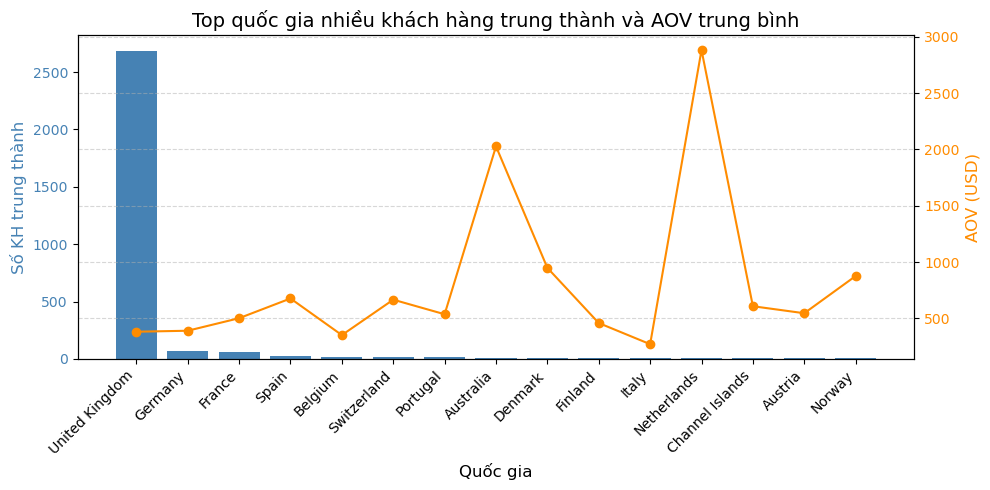

In [58]:
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu 
countries = top_15['country']
loyal_customers = top_15['num_loyal_customers']
aov_values = top_15['AOV']

# Tạo figure và axis chính
fig, ax1 = plt.subplots(figsize=(10, 5))

# Biểu đồ cột: số lượng khách hàng trung thành
color1 = 'steelblue'
ax1.bar(countries, loyal_customers, color=color1, label='Số khách hàng trung thành')
ax1.set_xlabel('Quốc gia', fontsize=12)
ax1.set_ylabel('Số KH trung thành', color=color1, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color1)
#ax1.set_xticklabels(countries, rotation=45, ha='right')
plt.xticks(rotation=45, ha='right')

# Trục thứ 2: AOV
ax2 = ax1.twinx()
color2 = 'darkorange'
ax2.plot(countries, aov_values, color=color2, marker='o', label='AOV (VND)')
ax2.set_ylabel('AOV (USD)', color=color2, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color2)

# Tiêu đề và căn chỉnh
plt.title('Top quốc gia nhiều khách hàng trung thành và AOV trung bình', fontsize=14)
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


## ✅ Tổng giá trị đơn hàng của các khách hàng trung thành

In [59]:
import pandas as pd

# 1. Loại bỏ dòng bị thiếu cust_id
df_valid = df.dropna(subset=['cust_id'])

# 2. Tìm các khách hàng có từ 2 đơn hàng trở lên (trung thành)
loyal_customers = df_valid.groupby('cust_id')['invoice_num'].nunique()
loyal_customers = loyal_customers[loyal_customers > 1].index

# 3. Lọc dữ liệu của các khách hàng trung thành
df_loyal = df_valid[df_valid['cust_id'].isin(loyal_customers)]

# 4. Nhóm theo quốc gia
summary = df_loyal.groupby('country').agg(
    num_loyal_customers=('cust_id', pd.Series.nunique),
    total_amount=('amount', 'sum')
).reset_index()

# 5. Sắp xếp theo số lượng khách hàng trung thành, chọn Top 15
top_15_loyal_countries = summary.sort_values('num_loyal_customers', ascending=False).head(15)

# 6. Hiển thị kết quả
print(top_15_loyal_countries)


            country  num_loyal_customers  total_amount
31   United Kingdom                 2686   6790811.683
12          Germany                   72    218185.340
11           France                   61    206691.190
26            Spain                   22     63619.870
2           Belgium                   19     37970.440
28      Switzerland                   17     44627.970
23         Portugal                   13     31667.260
0         Australia                    9    139897.850
7           Denmark                    8     18973.640
10          Finland                    7     18344.660
16            Italy                    7     12460.810
20      Netherlands                    6    273893.750
4   Channel Islands                    6     17021.800
1           Austria                    6      7094.320
21           Norway                    6     28915.130


✅ Biểu đồ

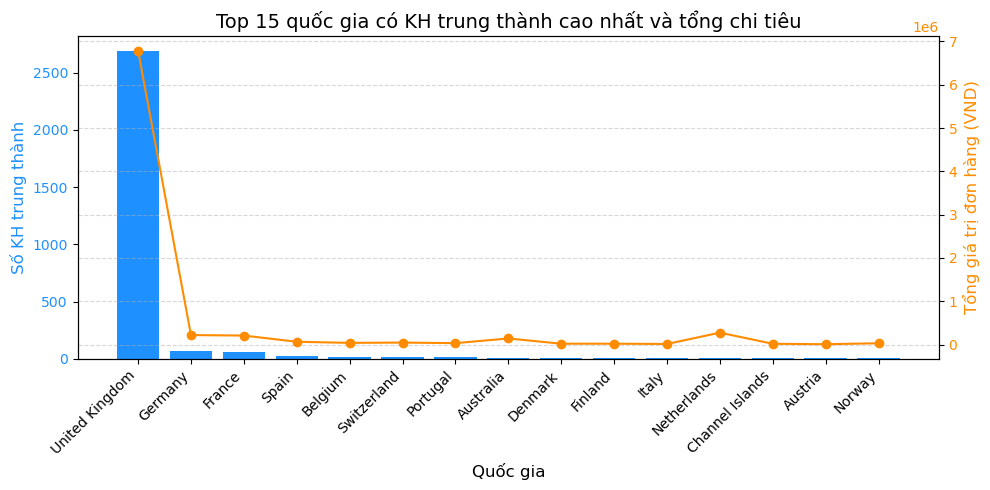

In [62]:
import matplotlib.pyplot as plt

# Giả sử bạn đã có biến: top_15_loyal_countries 
countries = top_15_loyal_countries['country']
loyal_customers = top_15_loyal_countries['num_loyal_customers']
total_amounts = top_15_loyal_countries['total_amount']

# Tạo biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 5))

# --- Trục Y bên trái: số lượng khách hàng trung thành ---
color1 = 'dodgerblue'
ax1.bar(countries, loyal_customers, color=color1, label='Số KH trung thành')
ax1.set_xlabel('Quốc gia', fontsize=12)
ax1.set_ylabel('Số KH trung thành', color=color1, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color1)
#ax1.set_xticklabels(countries, rotation=45, ha='right')
plt.xticks(rotation=45, ha='right')

# --- Trục Y bên phải: tổng giá trị đơn hàng ---
ax2 = ax1.twinx()
color2 = 'darkorange'
ax2.plot(countries, total_amounts, color=color2, marker='o', label='Tổng giá trị đơn hàng')
ax2.set_ylabel('Tổng giá trị đơn hàng (VND)', color=color2, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color2)

# Tiêu đề và căn chỉnh
plt.title('Top 15 quốc gia có KH trung thành cao nhất và tổng chi tiêu', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**📚 Tóm tắt**

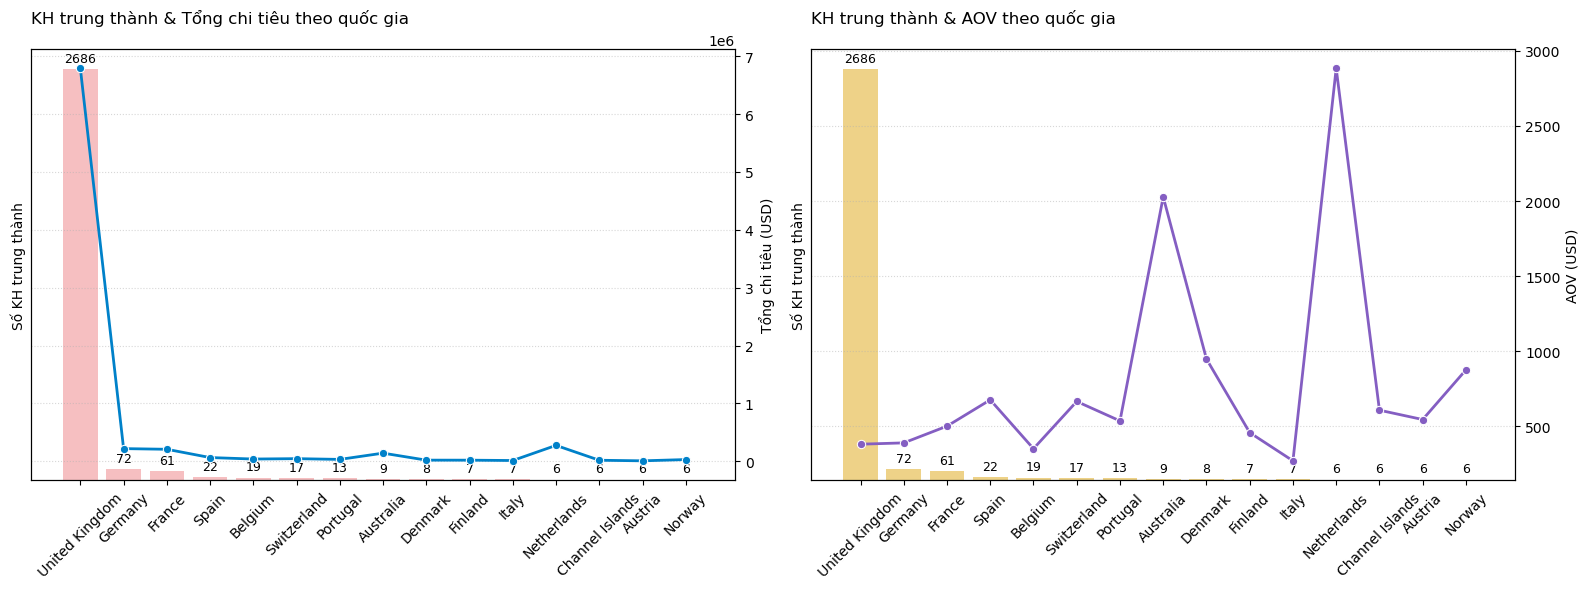

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subplot 1: Barplot - Loyal Customers vs Total Amount
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)

df1 = top_15_loyal_countries.copy()
df1 = df1.sort_values('num_loyal_customers', ascending=False)

ax = sns.barplot(
    data=df1,
    x='country',
    y='num_loyal_customers',
    color='#FFB6B9'
)

for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%d', fontsize=9)

plt.xticks(rotation=45)
plt.yticks([])
plt.xlabel('')
plt.ylabel('Số KH trung thành')
plt.title('KH trung thành & Tổng chi tiêu theo quốc gia\n', loc='left')

# Line: Total Amount
ax2 = ax.twinx()
sns.lineplot(
    data=df1,
    x='country',
    y='total_amount',
    color='#0081C9',
    marker='o',
    linewidth=2,
    ax=ax2
)
ax2.set_ylabel('Tổng chi tiêu (USD)')
ax2.grid(True, ls=':', alpha=0.5)

# Subplot 2: Barplot - Loyal Customers vs AOV
plt.subplot(1, 2, 2)

df2 = top_15.copy()
df2 = df2.sort_values('num_loyal_customers', ascending=False)

ax3 = sns.barplot(
    data=df2,
    x='country',
    y='num_loyal_customers',
    color='#FFDA77'
)

for container in ax3.containers:
    ax3.bar_label(container, padding=3, fmt='%d', fontsize=9)

plt.xticks(rotation=45)
plt.yticks([])
plt.xlabel('')
plt.ylabel('Số KH trung thành')
plt.title('KH trung thành & AOV theo quốc gia\n', loc='left')

# Line: AOV
ax4 = ax3.twinx()
sns.lineplot(
    data=df2,
    x='country',
    y='AOV',
    color='#845EC2',
    marker='o',
    linewidth=2,
    ax=ax4
)
ax4.set_ylabel('AOV (USD)')
ax4.grid(True, ls=':', alpha=0.5)

plt.tight_layout()
plt.show()


## Tính AOV nhóm `Loyal`

In [64]:
# Bước 1: Lọc dữ liệu chỉ lấy khách hàng trung thành
df_loyal = df[df['segment'] == 'Loyal']

# Bước 2: Tính AOV theo từng quốc gia
aov_by_country = df_loyal.groupby('country').agg({
    'amount': 'sum',
    'invoice_num': 'nunique'
}).reset_index()

# Bước 3: Tính AOV = tổng amount / số lượng đơn hàng
aov_by_country['AOV_loyal'] = aov_by_country['amount'] / aov_by_country['invoice_num']

# Bước 4: Sắp xếp giảm dần theo AOV
aov_by_country = aov_by_country.sort_values(by='AOV_loyal', ascending=False)

# Bước 5: (Tùy chọn) Chỉ hiển thị các cột quan trọng
aov_by_country = aov_by_country[['country', 'AOV_loyal']]

# Hiển thị kết quả
print(aov_by_country)



            country    AOV_loyal
10      Netherlands  3120.184713
8             Japan  2171.784000
15      Switzerland  1522.920000
2   Channel Islands   906.291111
3              EIRE   885.485888
12         Portugal   603.371053
13            Spain   530.304074
0         Australia   463.443333
5            France   462.465167
16   United Kingdom   424.268495
6           Germany   381.183964
4           Finland   348.442222
11           Poland   341.168333
1           Belgium   257.710571
9             Malta   251.175000
14           Sweden   203.294615
7             Italy   196.791250


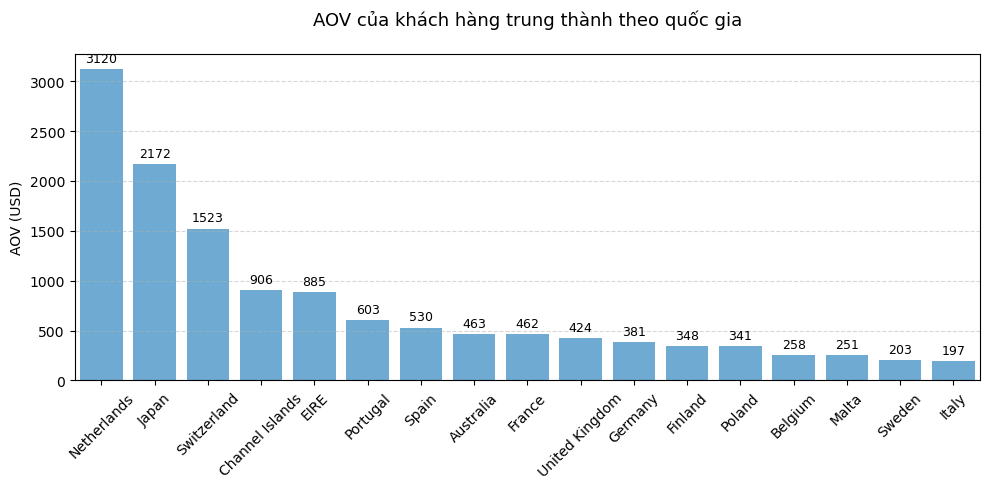

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 5))
dfplot = aov_by_country.sort_values('AOV_loyal', ascending=False)

ax = sns.barplot(
    data=dfplot,
    x='country',
    y='AOV_loyal',
    color='#5DADE2'
)

# Thêm nhãn cho từng cột
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, fontsize=9)


# Tùy chỉnh hiển thị
plt.title('AOV của khách hàng trung thành theo quốc gia\n', loc='center', fontsize=13)
plt.xlabel('')
plt.ylabel('AOV (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### **Kết luận**

Các khách hàng trung thành từ châu âu có `AOV` cao nhất nên cần chú ý chăm sóc nhóm khách hàng này

## ✅ Thống kê Top 10 sản phẩm bán nhiều nhất (theo số lượng và doanh thu)

In [66]:
# 1. Tổng số lượng bán theo sản phẩm
quantity_per_product = df.groupby('stock_code')['quantity'].sum().reset_index()

# 2. Tổng doanh thu theo sản phẩm
revenue_per_product = df.groupby('stock_code')['amount'].sum().reset_index()

# 3. Gộp 2 bảng
product_summary = pd.merge(quantity_per_product, revenue_per_product, on='stock_code')

# 4. Sắp xếp theo doanh thu để lấy top 10 sản phẩm nổi bật
top_10_products = product_summary.sort_values(by='amount', ascending=False).head(10)

# Hiển thị kết quả
print(top_10_products)


     stock_code  quantity     amount
3673          M     10091  164741.89
2001      23166    152223  158692.86
1292      22423     12839  147325.57
3248     85123A     38538  105017.66
3675       POST      3112   86097.18
3234     85099B     46123   84972.96
2598      47566     15457   69476.73
3068      84879     34037   54494.69
1366      22502      1560   47733.60
1923      23084     23564   44559.43


✅ Biểu đồ: Doanh thu và số lượng bán ra

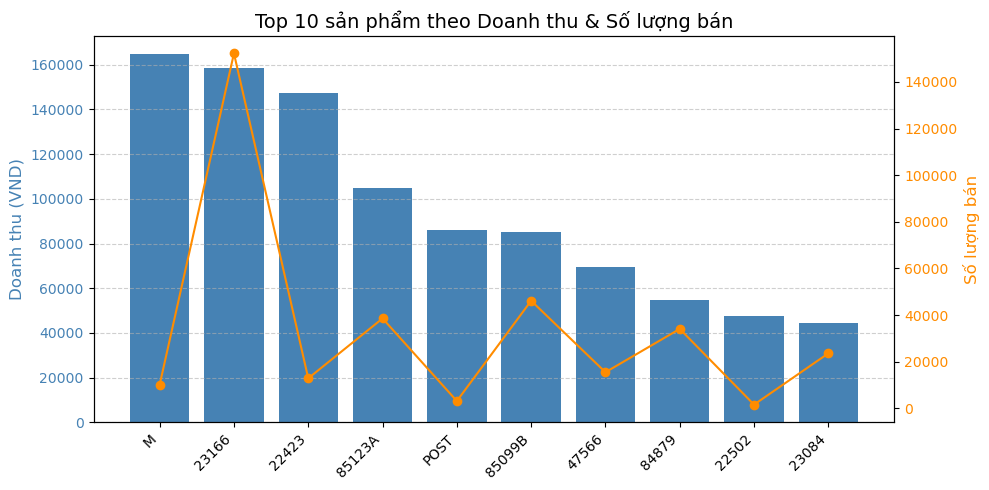

In [67]:
import matplotlib.pyplot as plt

# Lấy dữ liệu
products = top_10_products['stock_code']
revenues = top_10_products['amount']
quantities = top_10_products['quantity']

# Tạo figure và trục
fig, ax1 = plt.subplots(figsize=(10, 5))

# --- Trục Y bên trái: Doanh thu (Bar chart) ---
color1 = 'steelblue'
ax1.bar(products, revenues, color=color1, label='Doanh thu')
ax1.set_ylabel('Doanh thu (VND)', color=color1, fontsize=12)
ax1.tick_params(axis='y', labelcolor=color1)
#ax1.set_xticklabels(products, rotation=45, ha='right')
plt.xticks(rotation=45, ha='right')

# --- Trục Y bên phải: Số lượng bán (Line chart) ---
ax2 = ax1.twinx()
color2 = 'darkorange'
ax2.plot(products, quantities, color=color2, marker='o', label='Số lượng bán')
ax2.set_ylabel('Số lượng bán', color=color2, fontsize=12)
ax2.tick_params(axis='y', labelcolor=color2)

# Tiêu đề và lưới
plt.title('Top 10 sản phẩm theo Doanh thu & Số lượng bán', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


In [71]:
import pandas as pd

# Bước 1: Nhóm theo mã sản phẩm và lấy giá cao nhất (hoặc trung bình, tùy mục tiêu)
df_sorted_price = df.groupby('stock_code')['unit_price'].max().reset_index()

# Bước 2: Sắp xếp giảm dần theo đơn giá
df_sorted_price = df_sorted_price.sort_values(by='unit_price', ascending=False)

# Bước 3: Hiển thị kết quả
print(df_sorted_price.head(20))  # Hiển thị top 20 sản phẩm giá cao nhất


     stock_code  unit_price
3673          M    38970.00
3675       POST     8142.75
3671          D     1867.86
3672        DOT     1526.76
3670       CRUK     1038.75
1366      22502      649.50
1511      22655      295.00
1512      22656      295.00
1676      22826      195.00
1678      22828      165.00
1677      22827      165.00
3669         C2      150.00
1673      22823      125.00
778       21769       79.95
1775      22929       65.00
2939      84632       59.95
76        17003       57.60
3116     84963B       49.95
1903      23064       49.95
1683      22833       49.95


### **Kết luận**

🔍 1. Sản phẩm `"M"`: Doanh thu vượt trội dù số lượng bán ít

-   Đây là sản phẩm có doanh thu cao nhất nhưng số lượng bán ra lại khá thấp so với nhiều sản phẩm khác.

-   👉 Điều này gợi ý rằng giá bán mỗi đơn vị của sản phẩm `"M"` rất cao.

-   Có thể đây là mặt hàng cao cấp, giá trị lớn hoặc lợi nhuận biên cao.

📈 2. Sản phẩm `"23166"`: Bán số lượng nhiều nhất nhưng giá đơn vị thấp

-   Có số lượng bán ra cao nhất, gần như gấp nhiều lần so với các sản phẩm khác.

-   Tuy nhiên, doanh thu xếp thứ hai, chứng tỏ giá mỗi đơn vị khá rẻ hoặc lợi nhuận không cao.

-   👉 Đây có thể là sản phẩm phổ thông, được tiêu thụ đại trà. Tuy nhiên cần chú trọng vì SP này đem lại doanh thu lớn.

# ✅Tổng kết: ✅ Các insight rút ra từ dữ liệu doanh nghiệp:

-   Doanh thu và lượng đơn hàng bắt đầu tăng ổn định từ tháng 8-2011.
-   Cần tập trung vô các nhóm sản phẩm mang lại doanh thu cao (M, 23166, 22423...)
-   Tập trung chăm sóc đặc biệt nhóm khách hàng `Loyal` vì nhóm này mang lại doanh thu cao nhất dù chiếm số lượng không nhiều.
-   Chú trọng nhóm khách hàng `Loyal` tại Châu Âu vì nhóm này chiếm đa số trong `Loyal`
-   Khách hàng cũ có xu hướng trung thành hơn các khách hàng mới ---> Cần tăng cường liên kết với nhóm khách hàng này.